In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error, mean_squared_log_error

In [3]:
from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

In [4]:
from tqdm import tqdm_notebook
from itertools import product

In [5]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_trye)) *100

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv("stock_prices_sample.csv")

In [8]:
df.head(10)

,TICKER,FIGI,DATE,TYPE,FREQUENCY,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_OPEN,ADJ_HIGH,ADJ_LOW,ADJ_CLOSE,ADJ_VOLUME,ADJ_FACTOR,EX_DIVIDEND,SPLIT_RATIO
0,GEF,BBG000BLFQH8,2013-01-04,EOD,daily,46.31,47.6198,46.2300,47.3700,248000.0,38.517220,39.606614,38.450681,39.398849,248000.0,NaN,0.0,1.0
1,GEF,BBG000BLFQH8,2013-01-03,EOD,daily,46.43,46.5200,46.1400,46.4800,131300.0,38.617027,38.691882,38.375826,38.658613,131300.0,NaN,0.0,1.0
2,GEF,BBG000BLFQH8,2013-01-02,EOD,daily,45.38,46.5400,45.1600,46.4100,184900.0,37.743715,38.708516,37.560735,38.600392,184900.0,NaN,0.0,1.0
3,GF,BBG000C3C6S2,2018-06-05,Intraday,daily,18.86,18.9100,18.8700,18.8700,10000.0,18.860000,18.910000,18.870000,18.870000,10000.0,NaN,0.0,1.0
4,GF,BBG000C3C6S2,2018-06-04,EOD,daily,18.86,18.8900,18.7900,18.8100,39095.0,18.860000,18.890000,18.790000,18.810000,39095.0,NaN,0.0,1.0
5,GF,BBG000C3C6S2,2018-06-01,EOD,daily,18.58,18.7600,18.5800,18.7400,17468.0,18.580000,18.760000,18.580000,18.740000,17468.0,NaN,0.0,1.0
6,GF,BBG000C3C6S2,2018-05-31,EOD,daily,18.52,18.5200,18.3012,18.4900,22384.0,18.520000,18.520000,18.301200,18.490000,22384.0,NaN,0.0,1.0
7,GF,BBG000C3C6S2,2018-05-30,EOD,daily,18.47,18.6780,18.4700,18.6500,22633.0,18.470000,18.678000,18.470000,18.650000,22633.0,NaN,0.0,1.0
8,GF,BBG000C3C6S2,2018-05-29,EOD,daily,18.51,18.5100,18.1500,18.2562,67412.0,18.510000,18.510000,18.150000,18.256200,67412.0,NaN,0.0,1.0
9,GF,BBG000C3C6S2,2018-05-25,EOD,daily,18.76,18.8800,18.7600,18.8420,8775.0,18.760000,18.880000,18.760000,18.842000,8775.0,NaN,0.0,1.0


In [9]:
df.set_index("DATE", inplace = True)

# Cleaning the data

In [10]:
#deleting all entries in ticker that have GEF
df = df[df.TICKER != 'GEF']
df = df[df.TYPE != 'Intraday']

In [11]:
#we only need very few entries so, we will be droping alot pf coulmns
#creating a variable of columns we will be dropping
drop_cols = ['SPLIT_RATIO', 'EX_DIVIDEND', 'ADJ_FACTOR', 'ADJ_VOLUME', 'ADJ_CLOSE', 'ADJ_LOW', 'ADJ_HIGH', 'ADJ_OPEN', 'VOLUME', 'FREQUENCY', 'TYPE', 'FIGI']
df.drop(drop_cols, axis = 1, inplace = True)

In [12]:
df

,TICKER,OPEN,HIGH,LOW,CLOSE
DATE,,,,,
2018-06-04,GF,18.86,18.8900,18.7900,18.8100
2018-06-01,GF,18.58,18.7600,18.5800,18.7400
2018-05-31,GF,18.52,18.5200,18.3012,18.4900
2018-05-30,GF,18.47,18.6780,18.4700,18.6500
2018-05-29,GF,18.51,18.5100,18.1500,18.2562
...,...,...,...,...,...
2014-06-27,GF,18.63,18.6300,18.5100,18.6100
2014-06-26,GF,18.52,18.5901,18.4200,18.5300
2014-06-25,GF,18.66,18.7200,18.5900,18.6000


In [13]:
df["CLOSE"] = df["CLOSE"].values[::-1]

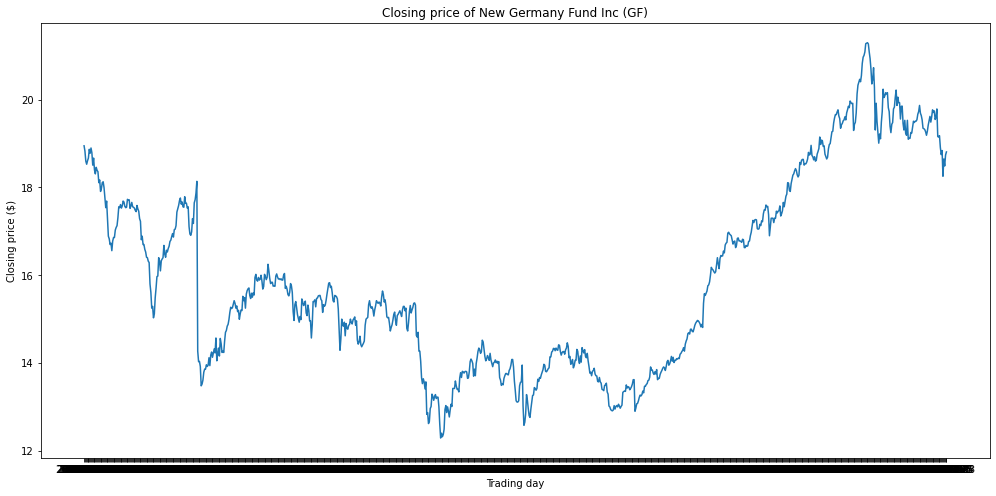

In [14]:
plt.figure(figsize=(17, 8))
plt.plot(df.CLOSE)
plt.title('Closing price of New Germany Fund Inc (GF)')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()

In [15]:
pl

NameError: name 'pl' is not defined